## HY Analyitics to retain best employees

#### 1 - We want to use HR analytics to understand why Employees Leave.
- To tackle this, we first will normalize all features so they are comparable.
- Then, we just have to applied a hierarchical clustering.
#### 2 - And to discover the actions that we can take in order to retain our best employees.

In [1]:
import pandas as pd
import numpy as np

# Read the data
df = pd.read_csv(
    "../DATA/HR.csv"
)

df = pd.DataFrame(df)

print(
    f"Dataset:\n{df.head(5)}\n"
)

print(
    f"Shape:\n{df.shape}"
)

print(
    f"\nMissing Values:\n{df.isnull().sum()}"
)

Dataset:
      S   LPE  NP  ANH  TIC  Newborn
0  0.38  0.53   2  157    3        0
1  0.80  0.86   5  262    6        0
2  0.11  0.88   7  272    4        0
3  0.72  0.87   5  223    5        0
4  0.37  0.52   2  159    3        0

Shape:
(2000, 6)

Missing Values:
S          0
LPE        0
NP         0
ANH        0
TIC        0
Newborn    0
dtype: int64


- S: Satisfaction from 0 to 1.
- LPE: Last project evaluation by client from 0 to 1.
- NP: Number of projects made by employee in the last 12 months.
- ANH: Average number of hours worked in the last 12 month by employee.
- TIC: Time Spent in Company in the last 12 months.
- Newborn: 1 if newborn had in the last 12 months, 0 otherwise.

In [56]:
df.describe()

,S,LPE,NP,ANH,TIC,Newborn
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.439955,0.721015,3.87700,207.914000,3.878000,0.052500
std,0.264734,0.197464,1.81756,61.331904,0.973442,0.223089
min,0.090000,0.450000,2.00000,126.000000,2.000000,0.000000
25%,0.110000,0.520000,2.00000,146.000000,3.000000,0.000000
50%,0.410000,0.790000,4.00000,225.000000,4.000000,0.000000
75%,0.730000,0.900000,6.00000,262.000000,5.000000,0.000000
max,0.920000,1.000000,7.00000,310.000000,6.000000,1.000000


In [57]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# Get a scaler object
scaler = MinMaxScaler()

# the scale function subtracts the mean and divides by the standard deviation of your variable

# Create a new dataframe for the scaled values
df_2_normalized = df.copy()

# Normalize the numeric columns
df_normalized = scaler.fit_transform(df_2_normalized)

df_n = pd.DataFrame(df_normalized, columns=df.columns)
df_n.head(2)

,S,LPE,NP,ANH,TIC,Newborn
0,0.349398,0.145455,0.0,0.168478,0.25,0.0
1,0.855422,0.745455,0.6,0.739130,1.00,0.0


## Visualize high-dimensional data - How many clusters?

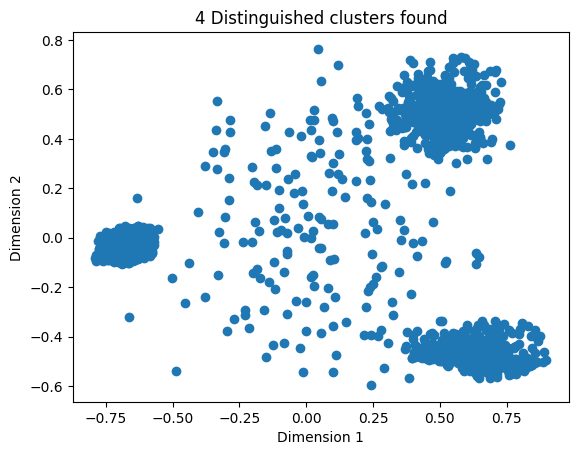

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(df_n)
features_2d = pca.transform(df_n)

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('4 Distinguished clusters found')
plt.show()

### Run proper clustering approach

In [59]:
from sklearn.cluster import AgglomerativeClustering
df_clustered = AgglomerativeClustering(n_clusters=4).fit(df_n)

### Make Business Decision and Visualize the data

In [61]:
df["group"] = df_clustered.labels_

informative_table = df.groupby(df.group)[df.columns].mean().drop("group", axis = 1)
informative_table.columns =["Satisfaction","Evaluation","# Projects","# Hours_Year","Time","Newborn"]

print(
    f"After clustering, we can observe the mean features corresponding to each group:\n\n{informative_table}"
)


After clustering, we can observe the mean features corresponding to each group:

       Satisfaction  Evaluation  # Projects  # Hours_Year      Time  Newborn
group                                                                       
0          0.737136    0.873072    4.486400    237.627200  4.824000      0.0
1          0.445524    0.719524    3.780952    204.352381  3.866667      1.0
2          0.102075    0.871761    6.220126    276.844864  4.100629      0.0
3          0.408235    0.510694    2.000000    143.504414  3.000000      0.0


## CONCLUSIONS
### - Group 0: **High Pot.** - Have a good evaluation rate, and lots of projects. But in contrast, they are very satisfied.
### **Solution:** Offering better salary or projects does not seem to be enough to retain them, maybe private conversation / relocation.
###
### - Group 1: **Misc.** - Not particular attributes.
### **Solution:** Small group, we can not explain everything and some results may be due to exogenal attributes.
###
### - Group 2: **Burned ones** - Have a good evaluation rate, and lots of projects. They have worked the most but are the least satisfied.
### **Solution:** High Priority to Retain. We should try to predict the next ones.
###
### - Group 3: **Low Perf.** - Did not do a lot of projects and have not been a lot of time in the business. Also, they have worked less hours and have not been then utilized that much.
### **Solution:** Not a Priority to Retain.
###
### ALSO:
#### Newborn seems an exogenous variable. Since it is a non-actionable variable, we should not have taken it into account.
#### The level of satisfaction is a consequence of more attributes, it is again, not actionable. However, it relies on the other attributes.
